In [3]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.0.0


In [4]:
from tensorflow.python.client import device_lib

def get_available_gpus():
  local_device_protos = device_lib.list_local_devices()
  return [x.name for x in local_device_protos if x.device_type == 'GPU']

print(get_available_gpus())
# 选择编号为1的GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2"

['/device:GPU:0', '/device:GPU:1', '/device:GPU:2', '/device:GPU:3']


In [5]:
# 获取gpus
tf.test.is_gpu_available()
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
cpus = tf.config.experimental.list_physical_devices(device_type='CPU')
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  4


In [6]:
# 选择编号为1的GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [7]:
train_dir = '../../datasets/10-monkey/training'
valid_dir = '../../datasets/10-monkey/validation'
label_file = '../../datasets/10-monkey/monkey_labels.txt'

print(os.path.exists(train_dir))

True


In [8]:
labels = pd.read_csv(label_file,header=0)
labels

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


In [9]:
height = 224
width =224
channels = 3
batch_size = 24
num_classes = 10

train_datagen = keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=keras.applications.resnet50.preprocess_input, 
    rotation_range=40, #随机旋转40度之内
    width_shift_range=0.2,# 水平位移
    height_shift_range=0.2, # 数值位移 比例
    shear_range=0.2,
    zoom_range=0.2,#缩放程度
    horizontal_flip=True,#水平翻转
    fill_mode='nearest', # 填充像素规则
)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(height,width),
                                                  batch_size=batch_size,
                                                  seed=7,
                                                  shuffle=True,
                                                  class_mode='categorical')

valid_datagen =keras.preprocessing.image.ImageDataGenerator(preprocessing_function=keras.applications.resnet50.preprocess_input)
valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                   target_size=(height,width),
                                                  batch_size=batch_size,
                                                  seed=7,
                                                  class_mode='categorical')

train_num = train_generator.samples
valid_num = valid_generator.samples
print(train_num,valid_num)

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.
1098 272


In [10]:
for i in range(2):
    x,y = train_generator.next()
    print(x.shape,y.shape)
    print(y)

(24, 224, 224, 3) (24, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
(24, 224, 224, 3) (24, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0

In [12]:
resnet50_fine_tuine = keras.models.Sequential()
resnet50_fine_tuine.add(keras.applications.ResNet50(include_top=False,
                                                   pooling='avg',
                                                   weights='imagenet'))
resnet50_fine_tuine.add(keras.layers.Dense(num_classes,activation='softmax'))
resnet50_fine_tuine.layers[0].trainable=False


resnet50_fine_tuine.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

resnet50_fine_tuine.summary()

94773248/94765736 [==============================] - 28s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 10)                20490     
Total params: 23,608,202
Trainable params: 20,490
Non-trainable params: 23,587,712
_________________________________________________________________


In [13]:
epochs =10
history = resnet50_fine_tuine.fit_generator(train_generator,steps_per_epoch=train_num//batch_size,
                             epochs=epochs,validation_data=valid_generator,
                             validation_steps=valid_num//batch_size)

Epoch 1/10
45/45 [==============================] - 42s 933ms/step - loss: 1.6710 - accuracy: 0.4665 - val_loss: 0.9542 - val_accuracy: 0.6742
Epoch 2/10
45/45 [==============================] - 41s 912ms/step - loss: 0.7319 - accuracy: 0.8426 - val_loss: 0.4960 - val_accuracy: 0.8674
Epoch 3/10
45/45 [==============================] - 40s 890ms/step - loss: 0.4647 - accuracy: 0.9246 - val_loss: 0.3663 - val_accuracy: 0.8864
Epoch 4/10
45/45 [==============================] - 40s 888ms/step - loss: 0.3486 - accuracy: 0.9469 - val_loss: 0.3395 - val_accuracy: 0.8939
Epoch 5/10
45/45 [==============================] - 39s 877ms/step - loss: 0.3190 - accuracy: 0.9413 - val_loss: 0.2938 - val_accuracy: 0.9015
Epoch 6/10
45/45 [==============================] - 38s 847ms/step - loss: 0.2677 - accuracy: 0.9469 - val_loss: 0.2712 - val_accuracy: 0.9242
Epoch 7/10
45/45 [==============================] - 37s 814ms/step - loss: 0.2406 - accuracy: 0.9534 - val_loss: 0.2581 - val_accuracy: 0.9280

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


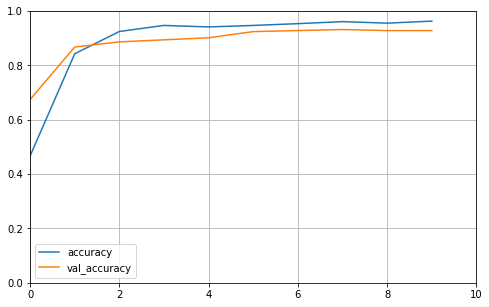

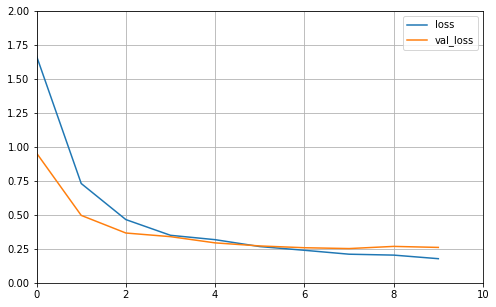

In [14]:
print(history.history.keys())

def plot_learning_curves(history,label,epochs,min_value,max_value):
    data = {}
    data[label]=history.history[label]
    data['val_'+label] = history.history['val_'+label]
    pd.DataFrame(data).plot(figsize=(8,5))
    plt.grid(True)
    plt.axis([0,epochs,min_value,max_value])
    plt.show()
    
plot_learning_curves(history,'accuracy',epochs,0,1)
plot_learning_curves(history,'loss',epochs,0,2)

In [15]:
# fine tune 最后几层
resnet50 = keras.applications.ResNet50(include_top=False,pooling='svg',weights='imagenet')
resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [16]:
for layer in resnet50.layers[0:-5]: # 遍历后五层
    layer.trainable = False
    
resnet50_new = keras.models.Sequential([
    resnet50,
    keras.layers.Dense(num_classes,activation='softmax')
])
resnet50_new.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
resnet50_new.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, None, None, 2048)  23587712  
_________________________________________________________________
dense_1 (Dense)              (None, None, None, 10)    20490     
Total params: 23,608,202
Trainable params: 1,075,210
Non-trainable params: 22,532,992
_________________________________________________________________


In [18]:
epochs =10
history = resnet50_new.fit_generator(train_generator,steps_per_epoch=train_num//batch_size,
                             epochs=epochs,validation_data=valid_generator,
                             validation_steps=valid_num//batch_size)

Epoch 1/10


InvalidArgumentError: Incompatible shapes: [24,10] vs. [24,7,7,10] [Op:Mul] name: loss/dense_1_loss/mul/